## Task 2.1 - Unsupervised Learning - Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# from kmodes.kmodes import KModes not used!
from imblearn.under_sampling import TomekLinks

## Read the preprocessed dataset

In [2]:
PetFinder_dataset = pd.read_csv("PetFinder_dataset_pp.csv")
PetFinder_dataset.shape

(12987, 28)

In [3]:
PetFinder_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Data columns (total 28 columns):
Type                    12987 non-null object
Age                     12987 non-null int64
Gender                  12987 non-null object
MaturitySize            12987 non-null object
FurLength               12987 non-null object
Vaccinated              12987 non-null object
Dewormed                12987 non-null object
Sterilized              12987 non-null object
Health                  12987 non-null object
Quantity                12987 non-null int64
Fee                     12987 non-null int64
State                   12987 non-null object
PhotoAmt                12987 non-null float64
Hasname                 12987 non-null int64
Breed                   12987 non-null object
Color                   12987 non-null object
Polarity                12987 non-null float64
Subjectivity            12987 non-null float64
DescWords               12987 non-null int64
AgeBin             

In [4]:
PetFinder_dataset.head(10)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,...,DescWords,AgeBin,FeeBin,PhotoAmtBin,PolarityBin,SubjectivityBin,DescwordsBin,Adopted,AdoptionSpeed,InitialAdoptionSpeed
0,Cat,3,Male,Small,Short,No,No,No,Healthy,1,...,69,"(-0.1, 3.0]","(0.0, 300.0]","(0.99, 3.99]","(0.1, 0.15]","(0.379, 0.442]","(56.0, 71.0]",True,instant adoption,2
1,Cat,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,...,23,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.0333, 0.1]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,0
2,Dog,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,...,69,"(-0.1, 3.0]","(-0.1, 0.0]","(3.99, 30.0]","(0.239, 0.288]","(0.521, 0.562]","(56.0, 71.0]",True,delayed adoption,3
3,Dog,4,Female,Medium,Short,Yes,Yes,No,Healthy,1,...,25,"(3.0, 12.0]","(0.0, 300.0]","(3.99, 30.0]","(0.288, 0.35]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,2
4,Dog,1,Male,Medium,Short,No,No,No,Healthy,1,...,81,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.35, 0.434]","(0.734, 1.0]","(71.0, 93.0]",True,instant adoption,2
5,Cat,3,Female,Medium,Short,No,No,No,Healthy,1,...,18,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(-1.001, 0.0]","(-0.001, 0.2]","(17.0, 25.0]",True,instant adoption,2
6,Cat,12,Male,Medium,Long,No,No,Not Sure,Healthy,1,...,78,"(3.0, 12.0]","(0.0, 300.0]","(0.99, 3.99]","(0.239, 0.288]","(0.379, 0.442]","(71.0, 93.0]",True,instant adoption,1
7,Cat,2,Female,Medium,Medium,No,No,No,Healthy,1,...,13,"(-0.1, 3.0]","(-0.1, 0.0]","(3.99, 30.0]","(0.0333, 0.1]","(0.65, 0.734]","(9.0, 17.0]",True,instant adoption,1
8,Cat,12,Female,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,...,45,"(3.0, 12.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.193, 0.239]","(0.486, 0.521]","(44.0, 56.0]",False,very late adoption,4
9,Dog,2,Male,Medium,Short,No,Yes,No,Healthy,1,...,12,"(-0.1, 3.0]","(-0.1, 0.0]","(3.99, 30.0]","(0.1, 0.15]","(0.442, 0.486]","(9.0, 17.0]",True,instant adoption,1


### Drop non Categorical Attributes 

In [5]:
PetFinder_dataset.drop(['Age','Quantity','Fee','State','PhotoAmt','Polarity','Subjectivity','DescWords','Health',],axis=1,inplace=True)

In [6]:
one_hot=pd.get_dummies(PetFinder_dataset.drop(['Adopted','AdoptionSpeed','InitialAdoptionSpeed'],axis=1))

In [7]:
one_hot.head(5)

,Hasname,Type_Cat,Type_Dog,Gender_Female,Gender_Male,Gender_Mixed,MaturitySize_Extra Large,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,...,"DescwordsBin_(-0.001, 9.0]","DescwordsBin_(135.0, 1257.0]","DescwordsBin_(17.0, 25.0]","DescwordsBin_(25.0, 34.0]","DescwordsBin_(34.0, 44.0]","DescwordsBin_(44.0, 56.0]","DescwordsBin_(56.0, 71.0]","DescwordsBin_(71.0, 93.0]","DescwordsBin_(9.0, 17.0]","DescwordsBin_(93.0, 135.0]"
0,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## 2.5. Finding Groups
### 2.5.1 - 5 clusters

In [8]:
kmeans5 = KMeans(n_clusters=5,n_init=100,max_iter=3000,random_state=0)

In [9]:
kmeans5 = kmeans5.fit(one_hot)

In [10]:
PetFinder_dataset.insert(PetFinder_dataset.shape[1],'5Clusters',kmeans5.labels_)
kmeans5.cluster_centers_

array([[ 8.72955975e-01,  2.93501048e-03,  9.97064990e-01,
         5.85324948e-01,  3.70649895e-01,  4.40251572e-02,
        -7.37257477e-17,  4.40251572e-02,  8.54507338e-01,
         1.01467505e-01,  1.38364780e-02,  3.55974843e-01,
         6.30188679e-01,  9.73584906e-01,  1.42557652e-02,
         1.21593291e-02,  6.38155136e-01,  6.28930818e-03,
         3.55555556e-01,  9.32494759e-01,  3.01886792e-02,
         3.73165618e-02, -1.16573418e-15,  9.70649895e-01,
         2.93501048e-02,  9.01467505e-02,  4.26834382e-01,
         1.77358491e-01,  1.54716981e-01,  4.06708595e-02,
         2.18029350e-02,  1.29979036e-02,  1.09014675e-02,
         1.67714885e-03,  3.35429769e-03,  4.02515723e-02,
         9.64360587e-03,  9.64360587e-03,  8.28511530e-01,
         4.77987421e-02,  1.23689727e-01,  8.81341719e-01,
         1.16142558e-01,  2.51572327e-03,  1.50943396e-02,
         6.03773585e-01,  3.81132075e-01,  1.90356394e-01,
         2.38993711e-02,  9.85324948e-02,  9.68553459e-0

### 2.5.2 - 2 Clusters

In [11]:
kmeans2 = KMeans(n_clusters=2,n_init=100,max_iter=3000,random_state=0)
kmeans2 = kmeans2.fit(one_hot)
PetFinder_dataset.insert(PetFinder_dataset.shape[1],'2Clusters',kmeans2.labels_)
kmeans2.cluster_centers_

array([[ 9.13447783e-01,  9.99821173e-01,  1.78826896e-04,
         4.97138770e-01,  4.27932761e-01,  7.49284692e-02,
         1.25178827e-03,  7.56437768e-02,  6.17131617e-01,
         3.05972818e-01,  6.59871245e-02,  3.34406295e-01,
         5.99606581e-01,  5.99964235e-01,  9.81759657e-02,
         3.01859800e-01,  3.66952790e-01,  8.99499285e-02,
         5.43097282e-01,  7.09763948e-01,  1.00321888e-01,
         1.89914163e-01,  7.20851216e-01,  1.28397711e-01,
         1.50751073e-01,  5.77610873e-02,  4.24892704e-01,
         2.89699571e-02,  1.28576538e-01,  1.43061516e-02,
         3.04005722e-02,  3.00429185e-02,  6.52718169e-02,
         4.20243205e-02,  5.40057225e-02,  5.07868383e-02,
         1.77038627e-02,  5.52575107e-02,  5.06437768e-01,
         1.19992847e-01,  3.73569385e-01,  8.24213162e-01,
         1.67024320e-01,  8.76251788e-03,  1.82403433e-02,
         5.23605150e-01,  4.58154506e-01,  1.83476395e-01,
         3.29041488e-02,  1.09620887e-01,  1.09442060e-0

### 2.5.3 - 3 Clusters

In [12]:
kmeans3 = KMeans(n_clusters=3,n_init=100,max_iter=3000,random_state=0)
kmeans3 = kmeans3.fit(one_hot)
PetFinder_dataset.insert(PetFinder_dataset.shape[1],'3Clusters',kmeans3.labels_)
kmeans3.cluster_centers_

array([[ 9.44997835e-01,  2.71979212e-01,  7.28020788e-01,
         5.39844088e-01,  4.28323950e-01,  3.18319619e-02,
         5.41359896e-03,  1.45084452e-01,  6.46383716e-01,
         2.03118233e-01,  9.85275011e-02,  3.59679515e-01,
         5.41792984e-01,  3.00996102e-02,  1.58943265e-01,
         8.10957124e-01,  1.36422694e-02,  1.52230403e-01,
         8.34127328e-01,  2.57470767e-01,  1.70636639e-01,
         5.71892594e-01,  1.27977479e-01,  5.64746644e-01,
         3.07275877e-01,  7.62234734e-02,  3.23949762e-01,
         1.18233001e-01,  1.79298398e-01,  4.98051104e-02,
         3.18319619e-02,  3.83282806e-02,  3.87613686e-02,
         2.23040277e-02,  2.27371156e-02,  6.06323084e-02,
         1.42919013e-02,  2.36032915e-02,  3.83282806e-02,
         4.87873538e-01,  4.73798181e-01,  7.79558250e-01,
         1.88609788e-01,  3.18319619e-02,  2.88003465e-02,
         5.95279342e-01,  3.75920312e-01,  1.29493287e-01,
         2.75010827e-02,  9.00822867e-02,  9.35469900e-0

### 2.5.4 - 4 Clusters

In [13]:
kmeans4 = KMeans(n_clusters=4,n_init=100,max_iter=3000,random_state=0)
kmeans4 = kmeans4.fit(one_hot)
PetFinder_dataset.insert(PetFinder_dataset.shape[1],'4Clusters',kmeans4.labels_)
kmeans4.cluster_centers_

array([[ 8.81779053e-01,  8.60832138e-03,  9.91391679e-01,
         5.87374462e-01,  3.73888092e-01,  3.87374462e-02,
         5.73888092e-04,  4.84935438e-02,  8.65136298e-01,
         8.57962697e-02,  1.20516499e-02,  3.87374462e-01,
         6.00573888e-01,  6.66857963e-01,  1.54949785e-02,
         3.17647059e-01,  4.38737446e-01,  8.89526542e-03,
         5.52367288e-01,  9.39454806e-01,  3.50071736e-02,
         2.55380201e-02, -1.04360964e-14,  9.78766141e-01,
         2.12338594e-02,  8.55093257e-02,  4.28694405e-01,
         1.89383070e-01,  1.54375897e-01,  4.01721664e-02,
         1.95121951e-02,  1.34863702e-02,  1.03299857e-02,
         2.58249641e-03,  3.15638451e-03,  3.61549498e-02,
         8.32137733e-03,  8.32137733e-03,  8.72883788e-01,
         3.58680057e-02,  9.12482066e-02,  8.85509326e-01,
         1.11047346e-01,  3.44332855e-03,  1.31994261e-02,
         5.80487805e-01,  4.06312769e-01,  1.86800574e-01,
         2.35294118e-02,  1.01004304e-01,  8.75179340e-0

In [14]:
kmeans3.cluster_centers_.shape

(3, 77)

## 2.6. Clustering - Results and Discussion 

### 2.6.1 Comparative Analysis for 2 Clusters

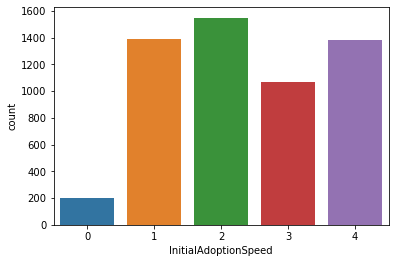

In [15]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['2Clusters']==0]['InitialAdoptionSpeed'])
plt.show()

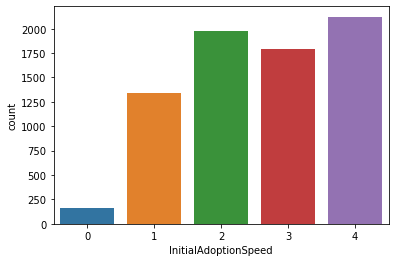

In [16]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['2Clusters']==1]['InitialAdoptionSpeed'])
plt.show()

### 2.6.2 Comparative Analysis for 3 Clusters

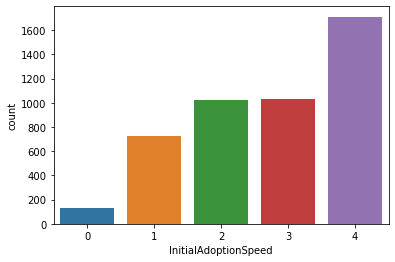

In [17]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['3Clusters']==0]['InitialAdoptionSpeed'])
plt.show()

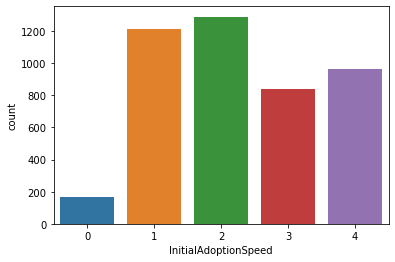

In [18]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['3Clusters']==1]['InitialAdoptionSpeed'])
plt.show()

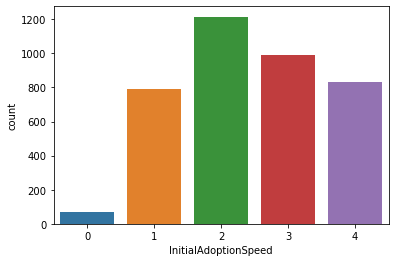

In [19]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['3Clusters']==2]['InitialAdoptionSpeed'])
plt.show()

### 2.6.3 Comparative Analysis for 5 Clusters

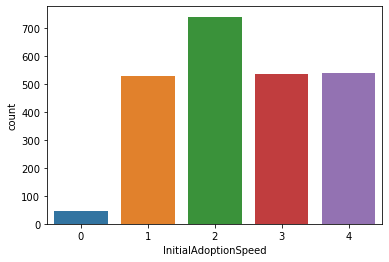

In [20]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['5Clusters']==0]['InitialAdoptionSpeed'])
plt.show()

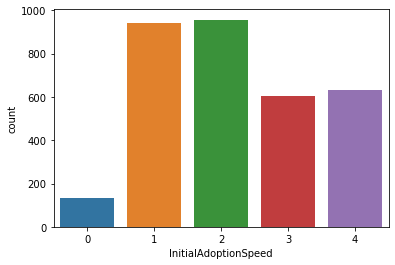

In [21]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['5Clusters']==1]['InitialAdoptionSpeed'])
plt.show()

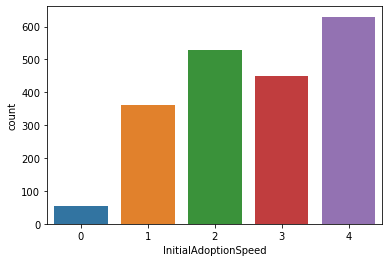

In [22]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['5Clusters']==2]['InitialAdoptionSpeed'])
plt.show()

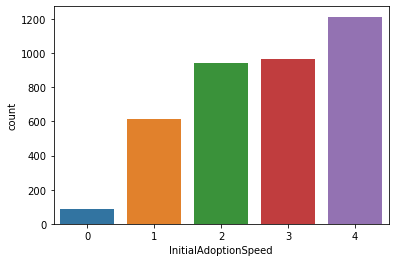

In [23]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['5Clusters']==3]['InitialAdoptionSpeed'])
plt.show()

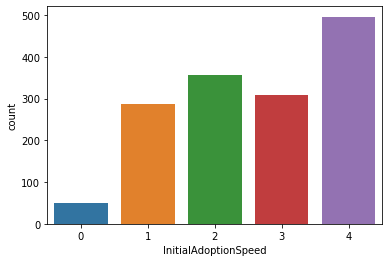

In [24]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['5Clusters']==4]['InitialAdoptionSpeed'])
plt.show()

### 2.6.4 Comparative Analysis for 4 Clusters

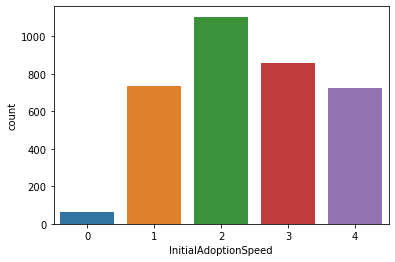

3485


In [25]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['4Clusters']==0]['InitialAdoptionSpeed'])
plt.show()
print(PetFinder_dataset[PetFinder_dataset['4Clusters']==0]['InitialAdoptionSpeed'].count())

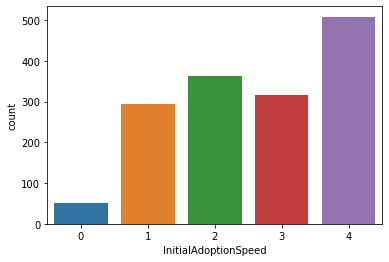

1533


In [26]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['4Clusters']==1]['InitialAdoptionSpeed'])
plt.show()
print(PetFinder_dataset[PetFinder_dataset['4Clusters']==1]['InitialAdoptionSpeed'].count())

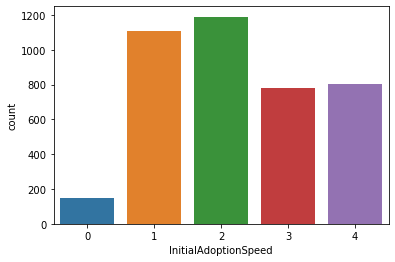

4028


In [27]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['4Clusters']==2]['InitialAdoptionSpeed'])
plt.show()
print(PetFinder_dataset[PetFinder_dataset['4Clusters']==2]['InitialAdoptionSpeed'].count())

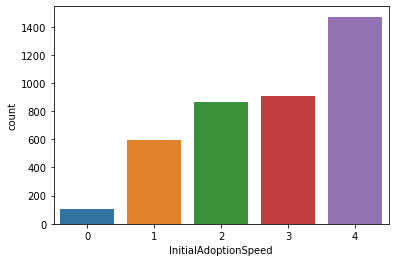

3941


In [28]:
sns.countplot(x=PetFinder_dataset[PetFinder_dataset['4Clusters']==3]['InitialAdoptionSpeed'])
plt.show()
print(PetFinder_dataset[PetFinder_dataset['4Clusters']==3]['InitialAdoptionSpeed'].count())

### 2.6.5 Discussion
The results are quite bad, in all computed clusters using Kmeans algorithm (no matter the number of clusters considered) there is no clear dominant class.
Due to the subjective criteria use by the adopters when selecting a pet, pets with very similar characteristics end up being adopted at different rates. Clearly, one the of the most important factors in the adoption decision is missing in the fetures we have avaialble ... Adopter mindset!  